In [33]:
gdf_is2.head()

,land_segments/canopy/h_canopy,land_segments/canopy/photon_rate_can,land_segments/terrain/photon_rate_te,land_segments/latitude,land_segments/longitude,orbit_info/sc_orient,root_beam,geometry
0,25.901031,1.253968,0.079365,56.411655,12.957654,1,gt3r,POINT (12.95765 56.41166)
1,25.209274,1.339450,0.211009,56.411842,12.957786,1,gt3r,POINT (12.95779 56.41184)
2,21.438889,0.712121,0.583333,56.411888,12.951652,0,gt1l,POINT (12.95165 56.41189)
3,28.140991,0.761538,0.023077,56.412010,12.957584,1,gt3r,POINT (12.95758 56.41201)
4,20.353882,0.657143,1.466667,56.412209,12.955589,1,gt3r,POINT (12.95559 56.41221)


In [2]:
import geopandas as gpd
gdf_is2 = gpd.read_parquet('../result/ratio_100m.parquet')

In [4]:
print(len(gdf_is2), gdf_is2.columns.values)

7250723 ['land_segments/canopy/h_canopy' 'land_segments/canopy/photon_rate_can'
 'land_segments/terrain/photon_rate_te' 'land_segments/latitude'
 'land_segments/longitude' 'orbit_info/sc_orient' 'root_beam' 'geometry']


In [5]:
# read als sites
sites = gpd.read_parquet('../data/all_sites_20231218.parquet')
sites.iloc[100]

region                                                 europe
name                                          spain_monfrague
area_ha                                              11.80918
epsg                                                    25830
geometry    MULTIPOLYGON (((-6.054344961196315 39.86402954...
Name: 100, dtype: object

453

In [18]:
type(sites['geometry'].iloc[0])

shapely.geometry.multipolygon.MultiPolygon

In [15]:
# Check which points intersect with the polygon
#df_site = gdf_is2[gdf_is2['geometry'].intersects(sites['geometry'].iloc[0])] # too slow. 
gdf_is2 = gdf_is2.reset_index(drop=True)
als_index = gdf_is2.sindex.query(sites['geometry'].iloc[0]) # super fast!!!!! # but only boundary box. 
is2_in_als = gdf_is2.loc[als_index] 
df_site = is2_in_als.clip(sites['geometry'].iloc[0])  # get points inside polygon.
df_site = df_site[df_site['land_segments/terrain/photon_rate_te'] < 140]
df_site

,land_segments/canopy/h_canopy,land_segments/canopy/photon_rate_can,land_segments/terrain/photon_rate_te,land_segments/latitude,land_segments/longitude,orbit_info/sc_orient,root_beam,geometry
1827591,17.198364,1.014493,0.275362,45.316616,-70.218857,0,gt2l,POINT (-70.21886 45.31662)
1827585,17.128296,1.273585,0.433962,45.316917,-70.217529,0,gt3l,POINT (-70.21753 45.31692)
1827586,13.351685,1.062500,0.625000,45.317032,-70.216560,0,gt1l,POINT (-70.21656 45.31703)
1827592,19.279846,1.223022,0.179856,45.317513,-70.218979,0,gt2l,POINT (-70.21898 45.31751)
1827587,13.420715,1.342857,0.447619,45.317814,-70.217407,0,gt3l,POINT (-70.21741 45.31781)
...,...,...,...,...,...,...,...,...
3422504,12.264954,1.022059,0.088235,46.803226,-69.784676,0,gt1l,POINT (-69.78468 46.80323)
3422497,17.063446,1.169118,1.338235,46.801182,-69.778412,1,gt2r,POINT (-69.77841 46.80118)
3422501,22.799774,0.849206,0.650794,46.801983,-69.780479,0,gt3l,POINT (-69.78048 46.80198)
3422505,15.696167,0.711111,1.333333,46.802082,-69.778290,1,gt2r,POINT (-69.77829 46.80208)


In [36]:

# Group by the 'root_file' column
grouped = df_site.groupby('root_beam')
# Now you can iterate over each group or perform operations/aggregations on each group
for beam, group in grouped:
    print("beam:", track)
    print(group) 

beam: gt3r
         land_segments/canopy/h_canopy  land_segments/canopy/photon_rate_can  \
3840825                      29.299713                              1.169014   
3840826                      31.312408                              1.285714   
3840829                      26.341583                              1.250000   
3840830                      28.313019                              1.322581   
3840834                      32.557678                              1.380952   
3840833                      31.569244                              1.024096   
3840837                      31.504669                              1.080460   
3840838                      34.375061                              1.189474   
3840842                      29.658661                              1.214286   
3840843                      32.848175                              1.277778   
3840848                      30.324921                              1.452632   

         land_segments/terra

In [16]:
import matplotlib.pyplot as plt
import os
import numpy
from pyproj import Transformer
from scipy import stats
from scipy import odr
# Orthogonal distance regression
# 正交方法能够同时考虑自变量和因变量的误差。
import matplotlib.pyplot as plt
import ipywidgets
from gedipy import h5io,rsmooth
def fit_model(rv,rg):
    idx = (rv > 0) & (rg > 0)
    tmp = odr.Data(rv[idx], rg[idx])
    linear = odr.ODR(tmp, odr.unilinear, beta0=[-1.0,numpy.mean(rg[idx])])
    result = linear.run()
    rhog = result.beta[1]
    rhov = -rhog / result.beta[0]
    rhovg = -1 / result.beta[0]
    pgap = 1 - rv / (rv + rg * rhovg)
    p,p2 = stats.pearsonr(rv,rg)
    return result.beta,p,pgap,rhovg


def plot_model(rv,rg,beta,r,pgap,rhov_rhog,site,lim=None):
    plt.rcParams.update({'font.size': 14})
    fig,ax = plt.subplots(1, 1, figsize=(10,8))
    s = ax.scatter(rv, rg, c=1-pgap, s=30, alpha=0.9, linewidth=0, vmin=0, vmax=1)
    ax.set(xlabel=r'$R_{v}$', ylabel=r'$R_{g}$', xlim=lim, ylim=lim, title=site.upper())
    xtmp = numpy.linspace(0,lim[1],num=2)
    ax.plot(xtmp, beta[0]*xtmp + beta[1], color='black', linewidth=1)
    ax.text(1.2, 1.7, r'$\frac{\rho_v}{\rho_g}=%.02f}$'%rhov_rhog, fontsize=14)
    ax.text(1.2, 1.5, r'$r^{2}=%.02f}$'%r**2, fontsize=14)
    cbar = ax.figure.colorbar(s, ax=ax)
    cbar.ax.set_ylabel('Canopy Cover', rotation=-90, va='bottom')        
    fig.canvas.draw()
    # Save the plot without displaying it
    # Save the plot to a PDF file
    fig.savefig('../result/ratioPlot/' + site + '.pdf', format='pdf', bbox_inches='tight')
    # Optionally, you can close the figure if you don't want to display it at all
    plt.close(fig)
# Sample data
rg = df_site['land_segments/terrain/photon_rate_te']
rv = df_site['land_segments/canopy/photon_rate_can']
site=sites['name'].iloc[20]
beta,r,pgap,rhov_rhog = fit_model(rv,rg)
plot_model(rv,rg,beta,r,pgap,rhov_rhog,site,lim=(0,2))

In [25]:
# plot all
gdf_is2 = gdf_is2.reset_index(drop=True)
for index, row in sites[:10].iterrows():
    print(index)
    #print(row['geometry'])
    als_index = gdf_is2.sindex.query(row['geometry']) # super fast!!!!! # but only boundary box. 
    is2_in_als = gdf_is2.loc[als_index] 
    df_site = is2_in_als.clip(row['geometry'])  # get points inside polygon.
    df_site = df_site[df_site['land_segments/terrain/photon_rate_te'] < 140]
    rg = df_site['land_segments/terrain/photon_rate_te']
    rv = df_site['land_segments/canopy/photon_rate_can']
    site=row['name']
    beta,r,pgap,rhov_rhog = fit_model(rv,rg)
    plot_model(rv,rg,beta,r,pgap,rhov_rhog,site,lim=(0,2))

0
1
2
3
4
5
6
7
8
9


In [27]:
VALID_SITES = ['amani','csir_agincourt', 'csir_dnyala', 'csir_ireagh', 'csir_justicia', 'csir_venetia', 'csir_welverdient', 'drc_ghent_field_32635', 
               'drc_ghent_field_32733', 'drc_ghent_field_32734', 'gsfc_mozambique', 'jpl_lope', 'jpl_rabi', 'tanzania_wwf_germany', 'khaoyai_thailand', 
               'chowilla', 'credo', 'karawatha', 'litchfield', 'rushworth_forests', 'tern_alice_mulga', 'tern_robson_whole', 'costarica_laselva2019', 
               'skidmore_bayerischer', 'zofin_180607', 'spain_exts1', 'spain_exts2', 'spain_exts3', 'spain_exts4', 'spain_leonposada', 'spain_leon1', 
               'spain_leon2', 'spain_leon3', 'jpl_borneo_004', 'jpl_borneo_013', 'jpl_borneo_040', 'jpl_borneo_119', 'jpl_borneo_144', 'chave_paracou', 
               'embrapa_brazil_2020_and_a01', 'embrapa_brazil_2020_bon_a01', 'embrapa_brazil_2020_cau_a01', 'embrapa_brazil_2020_duc_a01', 
               'embrapa_brazil_2020_hum_a01', 'embrapa_brazil_2020_par_a01', 'embrapa_brazil_2020_rib_a01', 'embrapa_brazil_2020_tal_a01',
               'embrapa_brazil_2020_tan_a01', 'embrapa_brazil_2020_tap_a01', 'embrapa_brazil_2020_tap_a04', 'walkerfire_20191007', 
               'neon_abby2018', 'neon_abby2019', 'neon_abby2021', 'neon_bart2018', 'neon_bart2019', 'neon_blan2019', 'neon_blan2021', 
               'neon_clbj2018', 'neon_clbj2019', 'neon_clbj2021', 'neon_clbj2021', 'neon_dela2018', 'neon_dela2019', 'neon_dela2021', 
               'neon_dsny2018', 'neon_dsny2021', 'neon_grsm2018', 'neon_grsm2021', 'neon_guan2018', 'neon_harv2018', 'neon_harv2019', 
               'neon_jerc2019', 'neon_jerc2021', 'neon_jorn2018', 'neon_jorn2019', 'neon_jorn2021', 'neon_konz2019', 'neon_konz2020', 
               'neon_leno2018', 'neon_leno2019', 'neon_leno2021', 'neon_mlbs2018', 'neon_mlbs2021', 'neon_moab2018', 'neon_moab2021', 
               'neon_niwo2019', 'neon_niwo2020', 'neon_nogp2021', 'neon_onaq2019', 'neon_onaq2021', 'neon_osbs2018', 'neon_osbs2019', 
               'neon_osbs2021', 'neon_puum2020', 'neon_rmnp2018', 'neon_rmnp2020', 'neon_scbi2019', 'neon_scbi2021', 'neon_serc2019', 
               'neon_serc2021', 'neon_sjer2019', 'neon_soap2018', 'neon_soap2019', 'neon_soap2021', 'neon_srer2019', 'neon_srer2021', 
               'neon_stei2019', 'neon_stei2020', 'neon_ster2021', 'neon_tall2018', 'neon_tall2019', 'neon_tall2021', 'neon_teak2021', 
               'neon_ukfs2018', 'neon_ukfs2019', 'neon_ukfs2020', 'neon_unde2019', 'neon_unde2020', 'neon_wood2021', 'neon_wref2019', 
               'neon_wref2021', 'neon_yell2018', 'neon_yell2019', 'neon_yell2020', 
               'neon_blan2022', 'neon_clbj2022', 'neon_grsm2022', 'neon_moab2022', 'neon_onaq2022', 'neon_rmnp2022', 'neon_serc2022', 
               'neon_stei2022', 'neon_steicheq2022', 'neon_ster2022', 'neon_unde2022', 'inpe_brazil31983', 'inpe_brazil31981', 
               'inpe_brazil31979', 'inpe_brazil31976', 'inpe_brazil31975', 'inpe_brazil31973', 'inpe_brazil31974', 'inpe_brazil31978',
                'jrsrp_ilcp2015_wholeq6', 'csir_limpopo']

In [32]:
import glob
import PyPDF2

def merge_pdfs(filepaths, output_filepath):
    # Create a PDF merger object
    pdf_merger = PyPDF2.PdfMerger()

    # Iterate through each PDF file and append it to the merger
    for filepath in filepaths:
        with open(filepath, 'rb') as pdf_file:
            pdf_merger.append(pdf_file)

    # Write the merged PDF to the output file
    with open(output_filepath, 'wb') as output_file:
        pdf_merger.write(output_file)
print('# merge into a single pdf...')

# Example usage:
# List of PDF files to be merged
pdf_files_to_merge = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ratioPlot/*.pdf')

# get only valid sites 
# len(VALID_SITES)
# usa_neon_clbj2022.jpeg
valid_pdf=[]
for f in pdf_files_to_merge:
    base_name = os.path.basename(f)[:-4]
    # usa_neon_clbj2022.jpeg 
    #split_strings = base_name.split('_')
    #site1 = '_'.join(split_strings[1:])
    if base_name in VALID_SITES:
        #print(site1)
        valid_pdf.append(f)
valid_pdf = sorted(valid_pdf)
# Output file name for the merged PDF
output_pdf_file = '../report/valid_sites_rvrg_ratio_v20240206.pdf'
# Call the merge_pdfs function
merge_pdfs(valid_pdf, output_pdf_file)

# merge into a single pdf...


In [37]:
'gt1r'[-1]

'r'

In [40]:
numpy.zeros((3,2,2), dtype=numpy.float32)

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]], dtype=float32)

In [44]:
p = numpy.array([0.1, 0.6, 0.9, 0.8])
n = numpy.array([10, 20, 30, 40])

In [68]:
len(p[n == 5])

0

In [53]:
numpy.any(numpy.array([0, 0, 0, 1]))

True

In [58]:
test = (1,2,3,2 )
type(test)

tuple

In [60]:
output = numpy.full((3,2,2), -9999, dtype=numpy.float32)
output

array([[[-9999., -9999.],
        [-9999., -9999.]],

       [[-9999., -9999.],
        [-9999., -9999.]],

       [[-9999., -9999.],
        [-9999., -9999.]]], dtype=float32)

In [61]:
'atl.h5'[:-3]

'atl'

In [63]:
numpy.array([1,2]) * numpy.array([1,2])

array([1, 4])

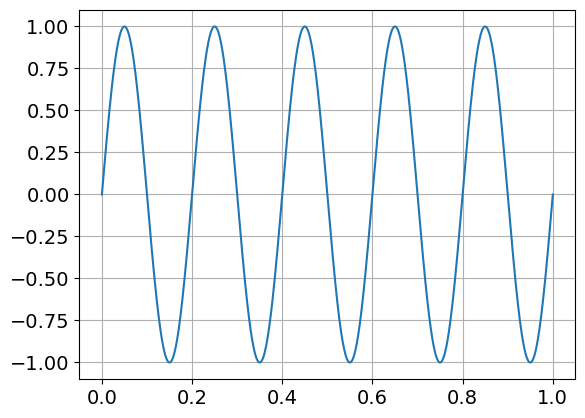

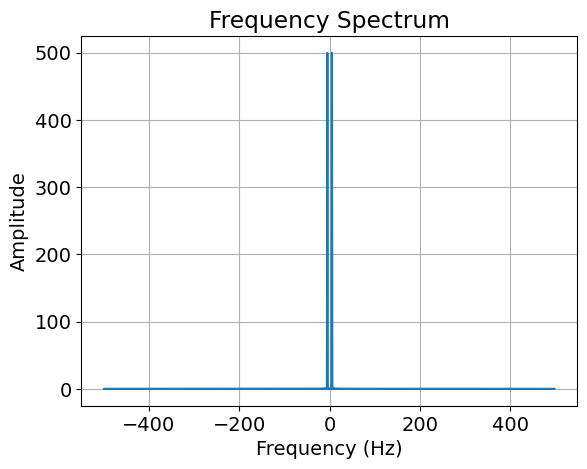

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load or generate time-amplitude data
# For example, let's generate a simple sine wave
t = np.linspace(0, 1, 1000)  # Time vector from 0 to 1 second
amplitude = np.sin(2 * np.pi * 5 * t)  # Sine wave with frequency of 5 Hz

plt.plot(t, amplitude)
plt.grid(True)
plt.show()
# Step 3: Perform FFT
fft_result = np.fft.fft(amplitude)

# Step 4: Compute frequency bins
sampling_freq = 1000  # Sampling frequency (samples per second)
freq_bins = np.fft.fftfreq(len(t), 1 / sampling_freq)

# Step 5: Plot the results

plt.plot(freq_bins, np.abs(fft_result))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
